In [49]:
import numpy as np
import pandas as pd
import matplotlib 
from scipy.stats import chi2_contingency
from IPython.display import HTML

In [37]:
X = pd.Series([1,23,4,2,3,1,5])
Y = pd.Series([2,4,1,2,4,6,3])

df = pd.DataFrame(data={
    'X': X,
    'Y': Y
}
)


In [36]:
print("Mittelwert von X: {}".format(X.mean().round(2)))
print("Varianz von X: {}".format(X.var().round(2)))
print("Median von X: {}".format(X.median().round(2)))
print("Kovarianz von X und Y: {}".format(df.cov().loc['X','Y'].round(2)))
print("Korrelation von X und Y: {}".format(df.corr().loc['X','Y'].round(2)))


Mittelwert von X: 5.57
Varianz von X: 61.29
Median von X: 3.0
Kovarianz von X und Y: 2.07
Korrelation von X und Y: 0.16


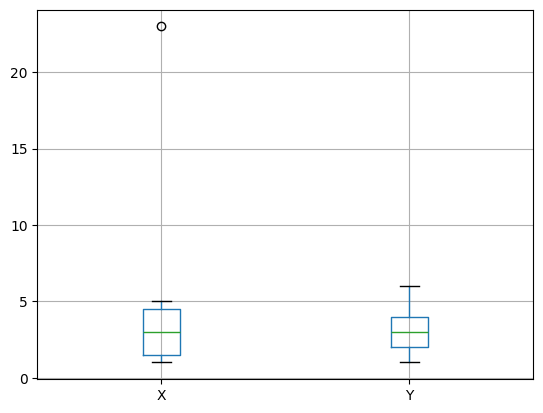

In [29]:
ax = df.boxplot()

In [50]:
HTML(df.to_html())

,X,Y
0,1,2
1,23,4
2,4,1
3,2,2
4,3,4
5,1,6
6,5,3


In [54]:
from flask import Flask, request, jsonify


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/marin/Uni/venv/lib64/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/marin/Uni/venv/lib64/python3.12/site-packages/traitlets/config/application.py", line 1074, in launch_instance
    app.initialize(argv)
  File "/home/marin/Uni/venv/lib64/python3.12/site-packages/traitlets/config/application.py", line 118, in inner
    return method(app, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/marin/Uni/venv/lib64/python3.12/site-packages/ipykernel/kernelapp.py", line 692, in initialize
    self.init_sockets()
  File "/home/marin/Uni/venv/lib64/python3.12/site-packages/ipykernel/kernelapp.py", line 331, in init_sockets
    self.shell_port = self._bind_socket(self.shell_socket,

SystemExit: 1

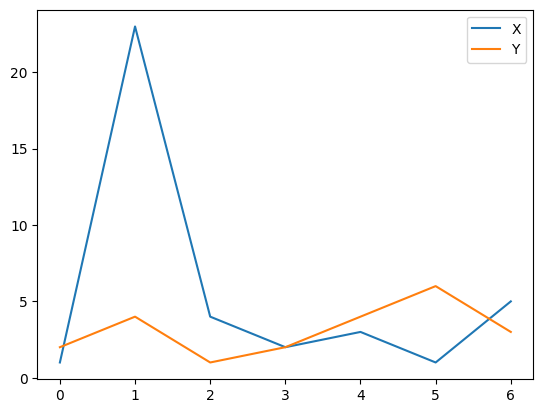

In [39]:
ax = df.plot()

In [60]:
df = pd.DataFrame(columns=['X1','X2'], index=['Y1','Y2'])

df = pd.DataFrame({
    'X1': [1, 2],
    'X2': [3, 4]
}, index=['Y1', 'Y2'])

In [80]:
# define chi2 and cramer v
def compute_chi2(df):
    """
    Compute the Chi-squared statistic manually for a given contingency table.
    
    Parameters:
    df (pd.DataFrame): A pandas DataFrame containing the contingency table data.
    
    Returns:
    float: The Chi-squared statistic.
    """
    # Step 1: Calculate the observed frequencies
    observed = df.values
    
    # Step 2: Calculate totals
    row_sums = observed.sum(axis=1)  # Sum of each row
    column_sums = observed.sum(axis=0)  # Sum of each column
    grand_total = observed.sum()  # Total sum of all observations
    
    # Step 3: Calculate expected frequencies
    expected = pd.DataFrame(0, index=df.index, columns=df.columns)  # Create an empty DataFrame for expected frequencies
    for i in range(len(row_sums)):
        for j in range(len(column_sums)):
            expected.iloc[i, j] = (row_sums[i] * column_sums[j]) / grand_total
            
    # Step 4: Calculate the Chi-squared statistic
    chi2_statistic = ((observed - expected.values) ** 2 / expected.values).sum()  # Using numpy broadcasting
    
    return chi2_statistic

def compute_cramers_v(df):
    """
    Compute Cramér's V statistic for a given contingency table.
    
    Parameters:
    df (pd.DataFrame): A pandas DataFrame containing the contingency table data.
    
    Returns:
    float: Cramér's V statistic.
    """
    # Step 1: Compute the Chi-squared statistic using the previously defined function
    chi2_statistic = compute_chi2(df)  # Assume compute_chi2 is defined as in previous messages
    
    # Step 2: Calculate total observations
    n = df.values.sum()
    
    # Step 3: Calculate the number of categories
    k = df.shape[0]  # Number of rows (categories for one variable)
    r = df.shape[1]  # Number of columns (categories for another variable)
    
    # Step 4: Calculate Cramér's V
    min_k_r = min(k - 1, r - 1)
    if min_k_r == 0:  # Avoid division by zero if there's only one category in either variable
        return 0.0
    
    cramers_v = (chi2_statistic / (n * min_k_r)) ** 0.5
    return cramers_v


In [71]:
# Adding a 'Total' column
df.loc[:, 'Total'] = df.sum(axis=1)

# Adding a 'Total' row
df.loc['Total'] = df.sum()

print(df)

       X1  X2  Total
Y1      1   3      4
Y2      2   4      6
Total   3   7     10


In [72]:
f11 = df.loc['Y1','X1']
f21 = df.loc['Y2','X1']
f12 = df.loc['Y1','X2']
f22 = df.loc['Y2','X2']

In [73]:
OddsRatio = f11 * f22 / (f21 * f12)
YulesQ = (OddsRatio - 1)/(OddsRatio + 1)

print("OddsRatio: {}, YulesQ: {}".format(OddsRatio, YulesQ))

OddsRatio: 0.6666666666666666, YulesQ: -0.20000000000000004


In [74]:
df2 = df.copy()

df2['X1'] = df2['X1']/df2.loc['Total','X1']
df2['X2'] = df2['X2']/df2.loc['Total','X2']
df2['Total'] = df2['Total']/df2.loc['Total','Total']

print(df2)

             X1        X2  Total
Y1     0.333333  0.428571    0.4
Y2     0.666667  0.571429    0.6
Total  1.000000  1.000000    1.0


In [75]:
prozentsatzdifferenz = df2.loc['Y1','X1'] - df2.loc['Y1','X2']

print("Prozentsatzdifferenz d = {}".format(prozentsatzdifferenz))

Prozentsatzdifferenz d = -0.09523809523809523


In [86]:
# Drop the row and column labeled 'Total'
df2_truncated = df2.drop(index='Total', columns='Total')
# Call the function to compute chi-squared
chisq_value = compute_chi2(df2_truncated)
CramerV = compute_cramers_v(df2_truncated)
print("Chi-squared statistic: {}, Cramer's V statistic: {}".format(chisq_value,CramerV))

Chi-squared statistic: 0.01923076923076923, Cramer's V statistic: 0.09805806756909201


/tmp/ipykernel_842629/2568317127.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.38095238095238093' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  expected.iloc[i, j] = (row_sums[i] * column_sums[j]) / grand_total
/tmp/ipykernel_842629/2568317127.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.38095238095238093' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  expected.iloc[i, j] = (row_sums[i] * column_sums[j]) / grand_total
/tmp/ipykernel_842629/2568317127.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.38095238095238093' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  expected.iloc[i, j] = (row_su